In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import seaborn as sns

# Importing the dataset

In [2]:
def get_data(data):
    dataset = pd.read_csv(data)
    X = dataset.drop(columns=['Sales'], axis=1).values
    y = pd.DataFrame(data=dataset['Sales']).values
    
    return X, y

# Spliting into train and test

In [3]:
def split_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    return X_train, X_test, y_train, y_test

# Training the Multiple Linear Regression model on the Training set

In [4]:
def decision_tree_regression(X_train, y_train):
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    
    return regressor

# Evaluating the Model Performance

In [5]:
def evaluate(y_test, y_pred):
    y_test = np.array(y_test, dtype=float)
    
    return r2_score(y_test, y_pred)

# Exporting the results to csv

In [6]:
def organize_prediction(X_pred, y_pred):
    y_pred= pd.DataFrame(data=y_pred, columns=['Sales'])
    y_pred = pd.concat([X_pred, y_pred], axis = 1)

    return y_pred

In [7]:
def export_result(y_pred, file_name):
    result = pd.concat([X_pred, y_pred], axis=1)
    result.to_csv(file_name)
    
    return None

# Visualize results

In [8]:
def plot_graph(y_pred, y_test, y_result):
    new_dataset = y_pred[['Year','Sales', 'Day', 'Month']].groupby(['Year', 'Day', 'Month']).sum().reset_index()
    fig = sns.lineplot(data=new_dataset[(new_dataset['Year'] == 2015) & (new_dataset['Month'] == 8)], x="Day", y="Sales")
    fig.set(xlim=(1,6))
    fig.ticklabel_format(style='plain', axis='y')
    fig.set_title('Accuracy {:.10f}%'.format(evaluate(y_test, y_result)))
    
    return None

# ETL

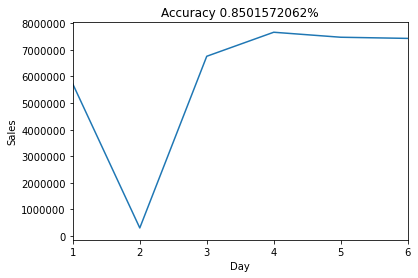

In [9]:
if __name__ == '__main__':
    # get data
    X, y = get_data('preprocessed_data/data.csv')
    X_pred = pd.read_csv('preprocessed_data/X_pred.csv')
    
    # split train and test
    X_train, X_test, y_train, y_test = split_train_test(X, y)
    
    # train
    regressor = decision_tree_regression(X_train, y_train)
    
    # predict
    y_result = regressor.predict(X_test)
    y_pred = regressor.predict(X_pred)
    
    # visualize
    y_pred = organize_prediction(X_pred, y_pred)
    # export_result(y_pred, 'result_data/decision_tree_regression.csv')
    plot_graph(y_pred, y_test, y_result)